<a href="https://colab.research.google.com/github/GRINTKIM/Self-Study-MachineLearing-DeepLearning/blob/master/08_3_%ED%95%A9%EC%84%B1%EA%B3%B1_%EC%8B%A0%EA%B2%BD%EB%A7%9D%EC%9D%98_%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

4422102/4422102 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                           

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3461 - accuracy: 0.8764 - val_loss: 0.2864 - val_accuracy: 0.8967
Epoch 3/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2959 - accuracy: 0.8948 - val_loss: 0.2584 - val_accuracy: 0.9045
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2662 - accuracy: 0.9033 - val_loss: 0.2526 - val_accuracy: 0.9056
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2434 - accuracy: 0.9112 - val_loss: 0.2257 - val_accuracy: 0.9176
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2226 - accuracy: 0.9193 - val_loss: 0.2299 - val_accuracy: 0.9152
Epoch 7/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2032 - accuracy: 0.9262 - val_loss: 0.2253 - val_accuracy: 0.9175
Epoch 8/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1896 - accuracy: 0.9291 - val_loss: 0.2197 - val_accuracy: 0.9206
Epo

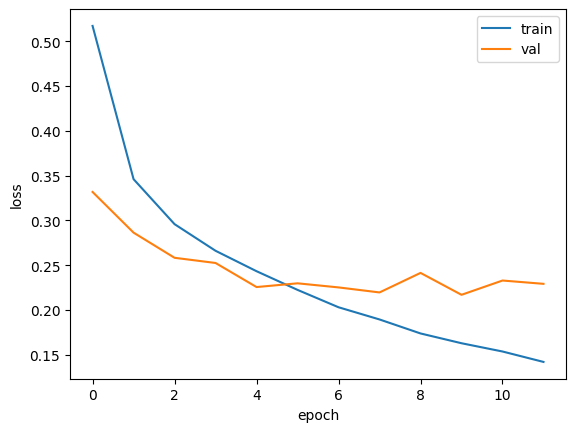

375/375 [==============================] - 1s 2ms/step - loss: 0.2171 - accuracy: 0.9237


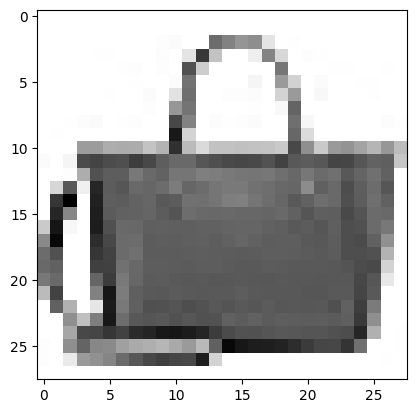

1/1 [==============================] - 0s 151ms/step
[[1.4459775e-23 4.0079054e-35 9.1487421e-28 3.1306087e-23 2.8700106e-26
  2.6991929e-18 2.1891886e-23 2.0574548e-23 1.0000000e+00 2.8048910e-22]]


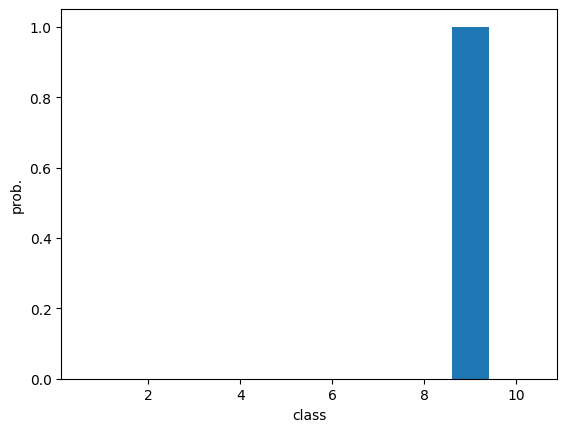

가방
313/313 [==============================] - 1s 3ms/step - loss: 0.2378 - accuracy: 0.9184


[0.23783886432647705, 0.91839998960495]

In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
# train_input shape: (48000, 28, 28) -> (48000, 28, 28, 1)
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled,
                                                                      train_target,
                                                                      test_size=0.2,
                                                                      random_state=42)

model = keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))   # -> (14, 14, 32)
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2))     # -> (7, 7, 64)
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
keras.utils.plot_model(model, show_shapes=True)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled,
                    train_target,
                    epochs=20,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

model.evaluate(val_scaled, val_target)

plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.show()

preds = model.predict(val_scaled[0:1])
print(preds)

plt.bar(range(1, 11), preds[0])
plt.xlabel('class')
plt.ylabel('prob.')
plt.show()

classes = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클 부츠']

print(classes[np.argmax(preds)])

test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

model.evaluate(test_scaled, test_target)

# 합성곱 신경망의 시각화
## 가중치 시각화

In [ ]:
model = keras.models.load_model('best-cnn-model.h5')

In [ ]:
model.layers

In [ ]:
conv = model.layers[0]
print(conv.weights[0].shape, conv.weights[1].shape)

(3, 3, 1, 32) (32,)


In [ ]:
conv_weights = conv.weights[0].numpy()
print(conv_weights.mean(), conv_weights.std())

-0.021871643 0.25573805


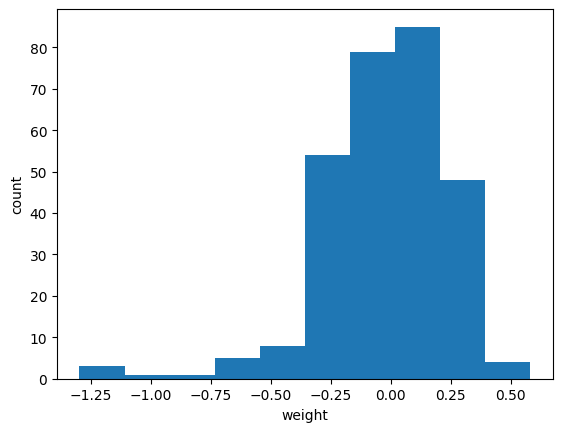

In [ ]:
plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

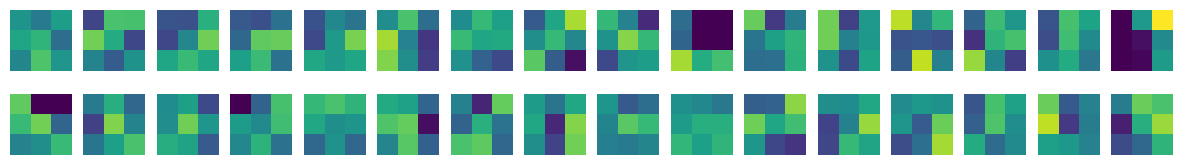

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(conv_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

In [ ]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1)))

In [ ]:
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [ ]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

0.006352932 0.08600032


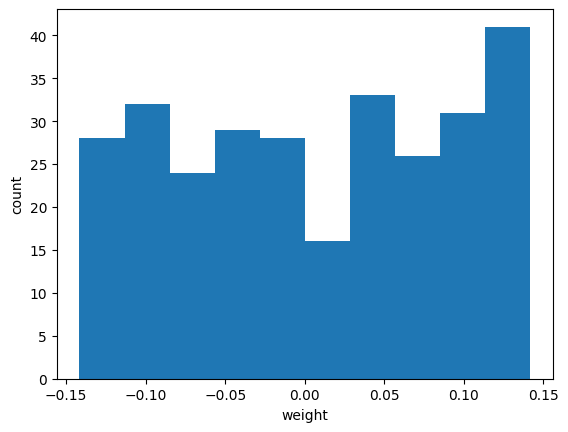

In [ ]:
plt.hist(no_training_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

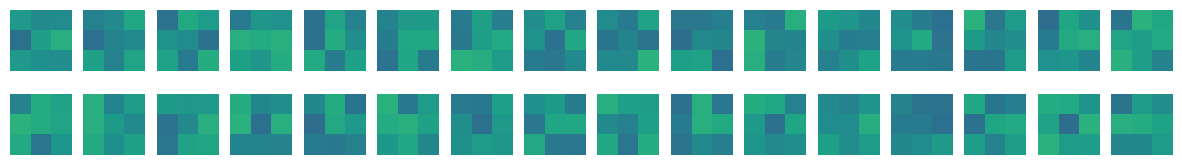

In [ ]:
fig, axs = plt.subplots(2, 16, figsize=(15, 2))
for i in range(2):
  for j in range(16):
    axs[i, j].imshow(no_training_weights[:, :, 0, i*16+j], vmin=-0.5, vmax=0.5)
    axs[i, j].axis('off')
plt.show()

## 함수형 API

In [ ]:
print(model.input)

KerasTensor(type_spec=TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name='conv2d_input'), name='conv2d_input', description="created by layer 'conv2d_input'")


In [ ]:
conv_acti = keras.Model(model.input, model.layers[0].output)

## 특성 맵 시각화

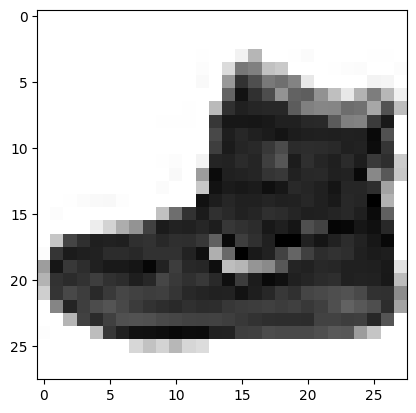

In [ ]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

plt.imshow(train_input[0], cmap='gray_r')
plt.show()

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv_acti.predict(inputs)

1/1 [==============================] - 0s 100ms/step


In [ ]:
print(feature_maps.shape)

(1, 28, 28, 32)


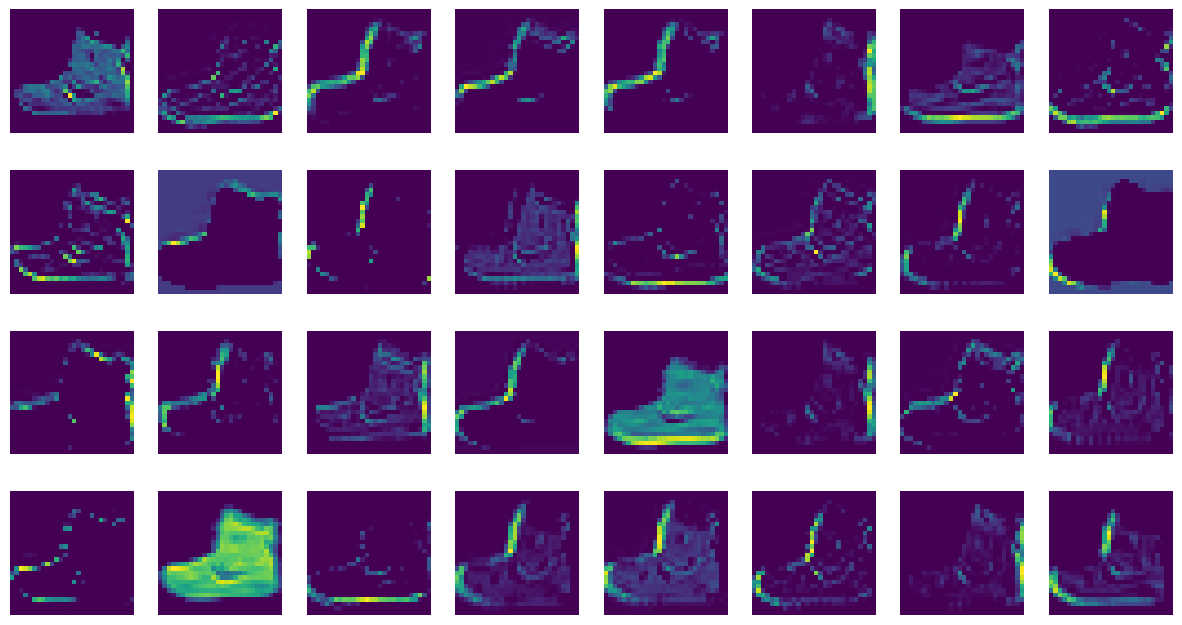

In [ ]:
fig, axs = plt.subplots(4, 8, figsize=(15, 8))
for i in range(4):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis('off')
plt.show()

32개 필터로 인해 강하게 활성화된 부분을 보여줌

In [ ]:
conv2_acti = keras.Model(model.input, model.layers[2].output)

In [ ]:
inputs = train_input[0:1].reshape(-1, 28, 28, 1) / 255.0
feature_maps = conv2_acti.predict(inputs)

1/1 [==============================] - 0s 198ms/step


In [ ]:
print(feature_maps.shape)

(1, 14, 14, 64)


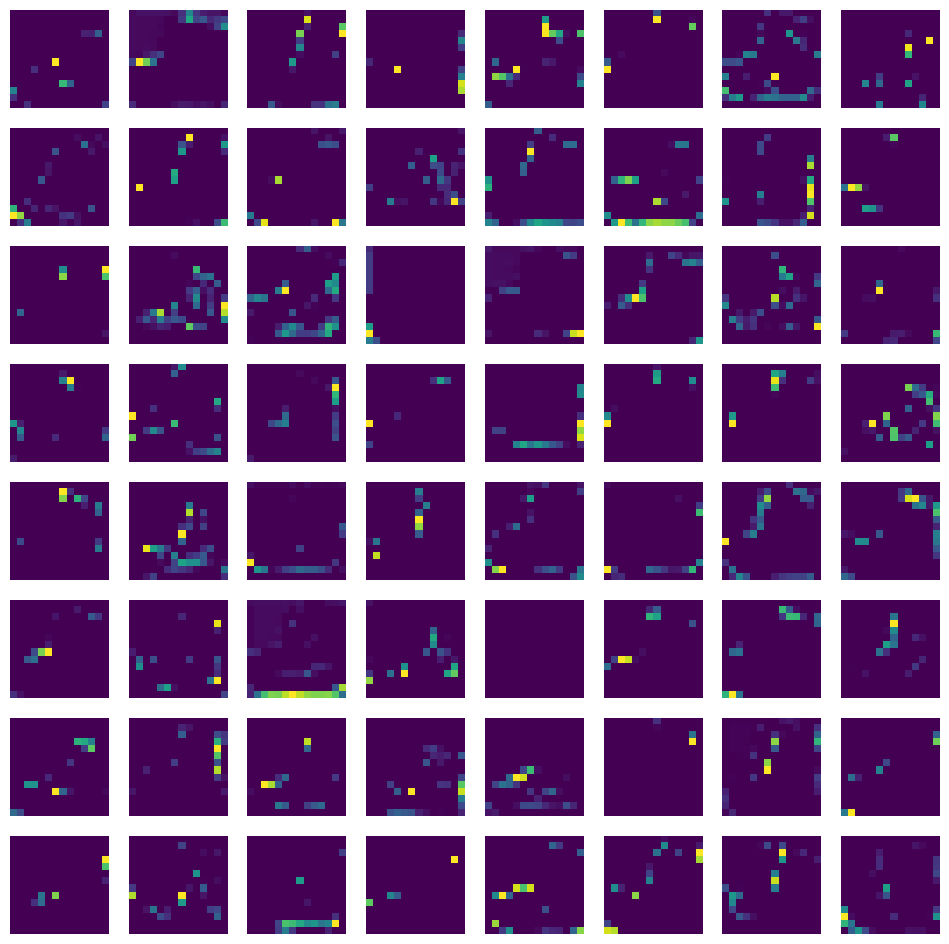

In [ ]:
fig, axs = plt.subplots(8, 8, figsize=(12, 12))
for i in range(8):
  for j in range(8):
    axs[i, j].imshow(feature_maps[0, :, :, i*8+j])
    axs[i, j].axis('off')
plt.show()

처음 본 특성 맵과 달리 직관적으로 이해하기 어려움  

합성곱 신경 망의 앞부분에 있는 합성곱 층은 이미지의 시각적인 정보를 감지하고  
뒤쪽에 있는 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습한다고 볼 수 있음